In [22]:
# %tensorflow_version 1.x
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

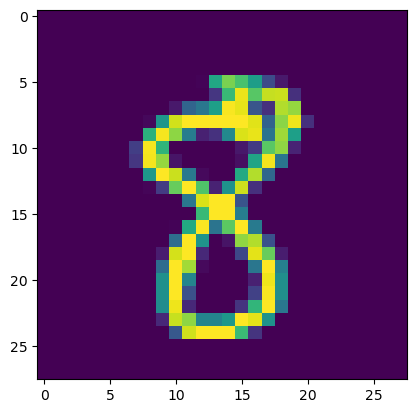

In [5]:
plt.imshow(x_train[46])

In [6]:
y_train[46]

8

In [7]:
model = Sequential()
model.add(Dense(units=20, activation='relu', input_shape=(784,), name='me_dense_1'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

2024-02-13 08:40:49.903381: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-13 08:40:49.906455: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 me_dense_1 (Dense)          (None, 20)                15700     
                                                                 
 dense (Dense)               (None, 20)                420       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 16330 (63.79 KB)
Trainable params: 16330 (63.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
from keras.utils import plot_model

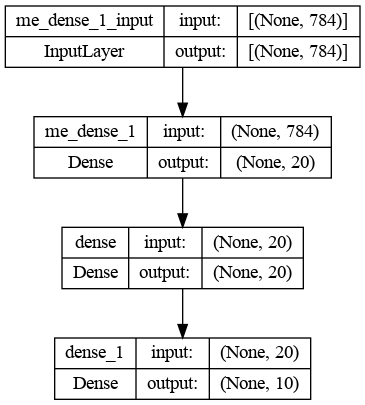

In [10]:
plot_model(model, to_file='./Images/mnist_model.png', show_shapes=True)

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784)/255
x_test = x_test.reshape(-1, 784)/255
print('x_test: ', x_test.shape)
print('x_train: ', x_train.shape)

x_test:  (10000, 784)
x_train:  (60000, 784)


In [12]:
from collections import Counter
Counter(y_train)

Counter({1: 6742,
         7: 6265,
         3: 6131,
         2: 5958,
         9: 5949,
         0: 5923,
         6: 5918,
         8: 5851,
         4: 5842,
         5: 5421})

In [13]:
from keras.utils import to_categorical

In [14]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [15]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [17]:
model.fit(x_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
938/938 [==============================] - 3s 2ms/step - loss: 0.5078 - acc: 0.8446
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2327 - acc: 0.9322
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1953 - acc: 0.9436
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1760 - acc: 0.9489
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1596 - acc: 0.9538
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1473 - acc: 0.9577
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1394 - acc: 0.9587
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1314 - acc: 0.9615
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1236 - acc: 0.9638
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1183 - acc: 0.9654
Epoch 11/20
938/938 [============================

In [18]:
pred = model.predict(x_test[1:3])

1/1 [==============================] - 0s 91ms/step


In [19]:
import numpy as np
np.argmax(pred,axis=1)

array([2, 1])

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

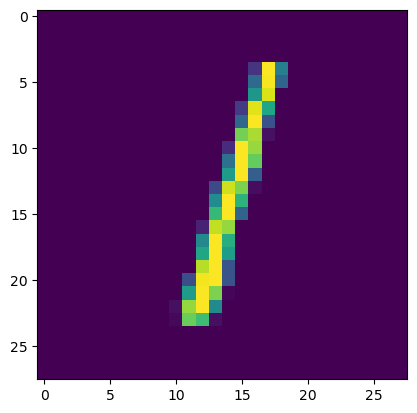

In [21]:
plt.imshow(x_test[2])